<a href="https://colab.research.google.com/github/petron23/ML_random_projects/blob/main/cnn_mnist_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Import PyTorch, a popular deep learning framework
import torch
from torch import nn  # Import neural network modules

# Import torchvision, a PyTorch library for computer vision tasks
import torchvision
from torchvision import datasets  # Import datasets for computer vision
from torchvision.transforms import ToTensor  # Import image transformation functions

# Import matplotlib for data visualization
import matplotlib.pyplot as plt

# Check versions to ensure compatibility
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")


PyTorch version: 2.1.0+cu118
torchvision version: 0.16.0+cu118


In [30]:
# Set up training data
train_data = datasets.FashionMNIST(
    root="data",         # Directory where the dataset will be stored
    train=True,          # Get the training data
    download=True,       # Download the data if it doesn't exist on disk
    transform=ToTensor(), # Convert images from PIL format to Torch tensors
    target_transform=None # You can transform labels as well if needed
)

# Set up testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,          # Get the testing data
    download=True,
    transform=ToTensor()  # Similar transformation for test data
)

class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

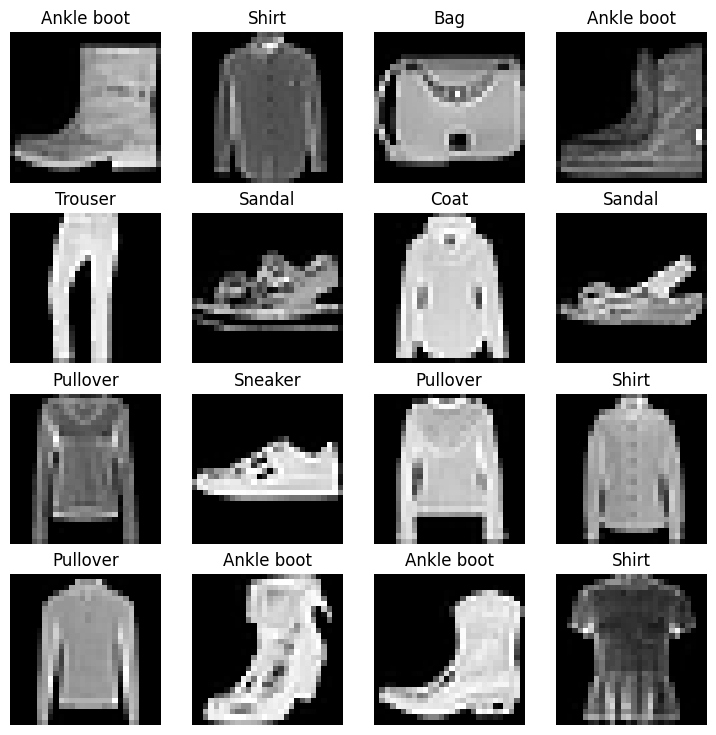

In [31]:
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
torch.manual_seed(42)

# Create a figure for plotting
fig = plt.figure(figsize=(9, 9))

# Define the number of rows and columns for the grid of images
rows, cols = 4, 4

# Loop to plot images
for i in range(1, rows * cols + 1):
    # Generate a random index to select a sample from the training dataset
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]

    # Add a subplot to the figure
    fig.add_subplot(rows, cols, i)

    # Display the image with a gray colormap
    plt.imshow(img.squeeze(), cmap="gray")

    # Add a title to the subplot, assuming you have a list of class names
    # Replace 'class_names' with your actual list of class names
    plt.title(class_names[label])

    # Turn off axis labels for cleaner presentation
    plt.axis(False)

# Show the plot with the selected images
plt.show()


In [32]:
# Import DataLoader from torch.utils.data
from torch.utils.data import DataLoader

# Define the batch size hyperparameter
BATCH_SIZE = 32

# Create data loaders for the training and testing datasets
# Data loaders allow you to iterate through the datasets in batches
train_dataloader = DataLoader(
    train_data,      # Dataset to turn into an iterable
    batch_size=BATCH_SIZE,  # Number of samples per batch
    shuffle=True   # Shuffle the data at the start of each epoch (for training)
)

test_dataloader = DataLoader(
    test_data,      # Dataset to turn into an iterable
    batch_size=BATCH_SIZE,  # Number of samples per batch
    shuffle=False  # No need to shuffle the testing data
)

# Print information about the data loaders
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")


Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7a16926ee380>, <torch.utils.data.dataloader.DataLoader object at 0x7a16926ee080>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [33]:
# Use the `next` function to extract a batch of features and labels from the training data loader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

# Check the shapes of the feature batch and label batch
feature_batch_shape = train_features_batch.shape
label_batch_shape = train_labels_batch.shape

# Print the shapes
print(f"Shape of the feature batch: {feature_batch_shape}")
print(f"Shape of the label batch: {label_batch_shape}")


Shape of the feature batch: torch.Size([32, 1, 28, 28])
Shape of the label batch: torch.Size([32])


Image size: torch.Size([1, 28, 28])
Label: 1, label size: torch.Size([])


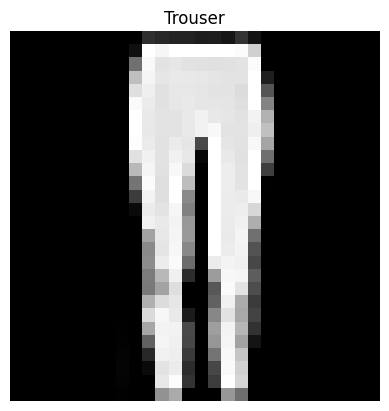

In [34]:
# Set a random seed for reproducibility
torch.manual_seed(5)

# Generate a random index to select a sample from the training batch
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()

# Retrieve the image and label for the selected random index
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

# Display the image
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])  # Assuming you have a list of class names
plt.axis("off")  # Turn off axis labels for cleaner presentation

# Print information about the image and label
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")


##Simple linear model

In [35]:
# Import the necessary PyTorch modules
from torch import nn

# Define a custom neural network model class
class dense_model_0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        # Define the layers of the model as a sequential stack
        self.layer_stack = nn.Sequential(
            nn.Flatten(),  # Flatten the input (vectorize it)
            nn.Linear(in_features=input_shape, out_features=hidden_units),  # Fully connected layer
            nn.Linear(in_features=hidden_units, out_features=output_shape)  # Fully connected layer
        )

    def forward(self, x):
        # Define the forward pass of the model
        return self.layer_stack(x)

In [36]:
def accuracy_fn(predictions, targets):
    """
    Calculate the accuracy of a model's predictions.

    Args:
    - predictions: Predicted class labels (e.g., model outputs).
    - targets: True class labels (ground truth).

    Returns:
    - accuracy: The accuracy of the model as a percentage.
    """
    # Ensure that the inputs have the same shape
    if predictions.shape != targets.shape:
        raise ValueError("Shape mismatch: predictions and targets must have the same shape.")

    # Calculate the number of correct predictions
    correct = (predictions == targets).sum().item()

    # Calculate the total number of examples
    total = len(targets)

    # Calculate the accuracy as a percentage
    accuracy = (correct / total) * 100.0

    return accuracy

model_0 = dense_model_0(input_shape=784, hidden_units=10, output_shape=len(class_names))
torch.manual_seed(42)
model_0.to("cpu")
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


In [49]:
import torch
from tqdm.auto import tqdm
from timeit import default_timer as timer

def train(model, train_dataloader, loss_fn, optimizer):
    model.train()
    train_loss = 0.0

    for batch_idx, (X, y) in enumerate(train_dataloader):
        # 1. Forward pass
        X, y = X, y
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Backpropagation
        optimizer.zero_grad()
        loss.backward()

        # 4. Optimizer step
        optimizer.step()

    # Average the training loss over all batches
    train_loss /= len(train_dataloader)
    return train_loss

def test(model, test_dataloader, loss_fn, accuracy_fn):
    model.eval()
    test_loss = 0.0
    test_accuracy = 0.0

    with torch.no_grad():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate test loss
            test_loss += loss_fn(test_pred, y).item()

            # 3. Calculate accuracy
            test_accuracy += accuracy_fn(targets=y, predictions=test_pred.argmax(dim=1))

        # Average the test loss and accuracy over all test batches
        test_loss /= len(test_dataloader)
        test_accuracy /= len(test_dataloader)

    return test_loss, test_accuracy

def train_and_evaluate(model, train_dataloader, test_dataloader, loss_fn, optimizer, accuracy_fn, epochs=3):
    # Set a random seed for reproducibility
    torch.manual_seed(42)

    # Initialize variables for tracking training time
    train_time_start_on_cpu = timer()

    # Training loop with progress bar
    for epoch in tqdm(range(epochs), desc="Epochs"):
        print(f"Epoch {epoch}:\n-------")

        # Training
        train_loss = train(model, train_dataloader, loss_fn, optimizer)

        # Testing
        test_loss, test_accuracy = test(model, test_dataloader, loss_fn, accuracy_fn)

        # Print training and testing results
        print(f"Train loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_accuracy:.2f}%")

    # Calculate and print the total training time
    train_time_end_on_cpu = timer()
    total_train_time_model = train_time_end_on_cpu - train_time_start_on_cpu
    print(f"Total training time: {total_train_time_model:.2f} seconds")


In [38]:
train_and_evaluate(model_0, train_dataloader, test_dataloader, loss_fn, optimizer, accuracy_fn, epochs=3)

Epochs:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0:
-------
Train loss: 0.59030 | Test loss: 0.50375, Test acc: 82.41%
Epoch 1:
-------
Train loss: 0.48061 | Test loss: 0.48872, Test acc: 82.74%
Epoch 2:
-------
Train loss: 0.45850 | Test loss: 0.48213, Test acc: 83.34%
Total training time: 28.55 seconds


# General evaluator

In [39]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(targets=y,
                                predictions=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'dense_model_0',
 'model_loss': 0.4821264445781708,
 'model_acc': 83.33666134185303}

#Other models

In [50]:
class dense_model_1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [51]:
model_1 = dense_model_1(input_shape=784, hidden_units=10, output_shape=len(class_names))
torch.manual_seed(42)
model_1.to("cpu")
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [52]:
train_and_evaluate(model_1, train_dataloader, test_dataloader, loss_fn, optimizer, accuracy_fn, epochs=3)

Epochs:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0:
-------
Train loss: 1.11456 | Test loss: 0.96320, Test acc: 63.41%
Epoch 1:
-------
Train loss: 0.90905 | Test loss: 0.74544, Test acc: 72.61%
Epoch 2:
-------
Train loss: 0.59508 | Test loss: 0.49708, Test acc: 82.77%
Total training time: 29.08 seconds


# Recreating the whole thing using GPU

In [53]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [68]:
import torch
from tqdm.auto import tqdm
from timeit import default_timer as timer

def train_gpu(model: torch.nn.Module,
          data_loader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          device: torch.device = device):
    model.to(device)
    model.train()
    train_loss = 0.0

    for batch_idx, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Backpropagation
        optimizer.zero_grad()
        loss.backward()

        # 4. Optimizer step
        optimizer.step()

    # Average the training loss over all batches
    train_loss /= len(train_dataloader)
    return train_loss

def test_gpu(model: torch.nn.Module,
         data_loader: torch.utils.data.DataLoader,
         loss_fn: torch.nn.Module,
         accuracy_fn,
         device: torch.device = device):
    model.to(device)
    model.eval()
    test_loss = 0.0
    test_accuracy = 0.0

    with torch.no_grad():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate test loss
            test_loss += loss_fn(test_pred, y).item()

            # 3. Calculate accuracy
            test_accuracy += accuracy_fn(targets=y, predictions=test_pred.argmax(dim=1))

        # Average the test loss and accuracy over all test batches
        test_loss /= len(test_dataloader)
        test_accuracy /= len(test_dataloader)

    return test_loss, test_accuracy

def train_and_evaluate_gpu(model, train_dataloader, test_dataloader, loss_fn, optimizer, accuracy_fn, epochs=3):
    # Set a random seed for reproducibility
    torch.manual_seed(42)

    # Initialize variables for tracking training time
    train_time_start_on_gpu = timer()

    # Training loop with progress bar
    for epoch in tqdm(range(epochs), desc="Epochs"):
        print(f"Epoch {epoch}:\n-------")

        # Training
        train_loss = train_gpu(model, train_dataloader, loss_fn, optimizer)

        # Testing
        test_loss, test_accuracy = test_gpu(model, test_dataloader, loss_fn, accuracy_fn)

        # Print training and testing results
        print(f"Train loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_accuracy:.2f}%")

    # Calculate and print the total training time
    train_time_end_on_gpu = timer()
    total_train_time_model = train_time_end_on_gpu - train_time_start_on_gpu
    print(f"Total training time: {total_train_time_model:.2f} seconds on {next(model.parameters()).device}")


In [102]:
torch.manual_seed(42)
model_1_b = dense_model_1(input_shape=784, hidden_units=10, output_shape=len(class_names))
#model_1.to("cpu")
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1_b.parameters(), lr=0.1)

In [103]:
train_and_evaluate_gpu(model_1_b, train_dataloader, test_dataloader, loss_fn, optimizer, accuracy_fn, epochs=3)

Epochs:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0:
-------
Train loss: 1.09199 | Test loss: 0.95637, Test acc: 65.00%
Epoch 1:
-------
Train loss: 0.78101 | Test loss: 0.72227, Test acc: 73.91%
Epoch 2:
-------
Train loss: 0.67027 | Test loss: 0.68500, Test acc: 75.02%
Total training time: 29.50 seconds on cuda:0


Took longer than the cpu version as the model is too small so couldn't make any advantage of it.

In [109]:
torch.manual_seed(42)
def eval_model_gpu(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):

    loss, acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(targets=y,
                                predictions=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}



In [110]:
# Calculate model 0 results on test dataset
model_1_b_results = eval_model_gpu(model=model_1_b, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_1_b_results

{'model_name': 'dense_model_1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

# CNNs

In [112]:
class CNN_model_0(nn.Module):
    def __init__(self, input_shape: int, output_shape: int, channels_1: int, channels_2: int,channels_3: int,channels_4: int):
      super().__init__()
      self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=channels_1,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=channels_1,
                      out_channels=channels_2,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
      )
      self.block_2 = nn.Sequential(
          nn.Conv2d(in_channels=channels_2, out_channels=channels_3, kernel_size = 3, padding=1),
          nn.ReLU(),
          nn.Conv2d(in_channels=channels_3, out_channels=channels_4, kernel_size = 3, padding=1),
          nn.ReLU(),
          nn.MaxPool2d(2)
      )
      self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=channels_4*7*7,
                    out_features=output_shape)
      )
    def forward(self, x):
          x = self.block_1(x)
          x = self.block_2(x)
          x = self.classifier(x)

          return x

In [113]:
torch.manual_seed(42)
model_2 = CNN_model_0(input_shape=1,
    channels_1=10,
    channels_2=10,
    channels_3=10,
    channels_4=10,
    output_shape=len(class_names)).to(device)
model_2

CNN_model_0(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

Some properties of conv layers in pytorch

In [136]:
images = torch.randn(size=(32, 3, 5, 5))
test_image = images[0]
print(images.shape, test_image.shape)
test_image_batched = test_image.unsqueeze(dim=0)
print(test_image_batched.shape)

torch.Size([32, 3, 5, 5]) torch.Size([3, 5, 5])
torch.Size([1, 3, 5, 5])


In [147]:
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=5,
                       kernel_size=2,
                       stride=1,
                       padding=0)
cl_1 = conv_layer(test_image_batched)
print(cl_1.shape)

torch.Size([1, 5, 4, 4])


In [149]:
print(conv_layer.state_dict()["weight"].shape) #5: output channels, 3:input channels, 2,2: kernel

torch.Size([5, 3, 2, 2])


In [150]:
print(conv_layer.state_dict()["bias"].shape) #5: output channels, 3:input channels, 2,2: kernel

torch.Size([5])


In [152]:
conv_layer.state_dict();

Loss function and optimizer for the cnn model

In [153]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                             lr=0.1)

In [157]:
train_and_evaluate_gpu(model_2, train_dataloader, test_dataloader, loss_fn, optimizer, accuracy_fn, epochs=10)

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0:
-------
Train loss: 0.30398 | Test loss: 0.32485, Test acc: 88.13%
Epoch 1:
-------
Train loss: 0.29031 | Test loss: 0.31035, Test acc: 88.48%
Epoch 2:
-------
Train loss: 0.27900 | Test loss: 0.30107, Test acc: 88.92%
Epoch 3:
-------
Train loss: 0.27083 | Test loss: 0.31182, Test acc: 88.63%
Epoch 4:
-------
Train loss: 0.26220 | Test loss: 0.29338, Test acc: 89.52%
Epoch 5:
-------
Train loss: 0.25764 | Test loss: 0.30205, Test acc: 89.16%
Epoch 6:
-------
Train loss: 0.25174 | Test loss: 0.28495, Test acc: 89.76%
Epoch 7:
-------
Train loss: 0.24854 | Test loss: 0.28031, Test acc: 89.74%
Epoch 8:
-------
Train loss: 0.24146 | Test loss: 0.28098, Test acc: 90.29%
Epoch 9:
-------
Train loss: 0.23971 | Test loss: 0.29519, Test acc: 89.55%
Total training time: 118.44 seconds on cuda:0


In [167]:
model_2.state_dict().keys()

odict_keys(['block_1.0.weight', 'block_1.0.bias', 'block_1.2.weight', 'block_1.2.bias', 'block_2.0.weight', 'block_2.0.bias', 'block_2.2.weight', 'block_2.2.bias', 'classifier.1.weight', 'classifier.1.bias'])

In [158]:
model_2.state_dict()["block_1.0.weight"]

tensor([[[[ 0.2473,  0.5480, -0.4998],
          [-0.0842,  0.4150,  0.1363],
          [-0.6186, -0.2050,  0.6492]]],


        [[[-0.8937,  0.7550, -0.0458],
          [ 0.3757,  0.5826, -0.3665],
          [-0.2676,  0.2265, -0.1884]]],


        [[[-0.0340, -0.4061,  0.2585],
          [-1.2741, -1.1345,  0.1337],
          [-1.4543, -1.2762, -0.4349]]],


        [[[-1.1931, -2.0536, -0.8931],
          [ 0.4212, -0.7347,  0.5028],
          [ 0.2354, -0.3601,  0.5065]]],


        [[[-0.3399,  0.4264,  0.3908],
          [-1.0345,  0.1110, -0.0804],
          [-0.5878,  0.2934,  0.4035]]],


        [[[-0.0535,  0.2463,  0.0619],
          [ 0.3107, -0.1710, -0.3226],
          [-0.1388, -0.2668,  0.2694]]],


        [[[ 0.4069, -0.2129, -0.1037],
          [ 0.3694, -0.1931, -0.4163],
          [-0.4035, -1.1442, -0.1819]]],


        [[[-0.0392, -0.2058, -0.2861],
          [ 0.4011, -0.3854, -0.8041],
          [-0.1563,  0.7672,  0.5577]]],


        [[[ 1.1574, -0.5513, -0.

(array([ 1.,  1.,  5.,  5.,  7., 26., 16., 21.,  7.,  1.]),
 array([-2.05360126, -1.73250461, -1.41140795, -1.09031129, -0.76921457,
        -0.44811791, -0.12702124,  0.19407544,  0.51517212,  0.83626878,
         1.15736544]),
 <BarContainer object of 10 artists>)

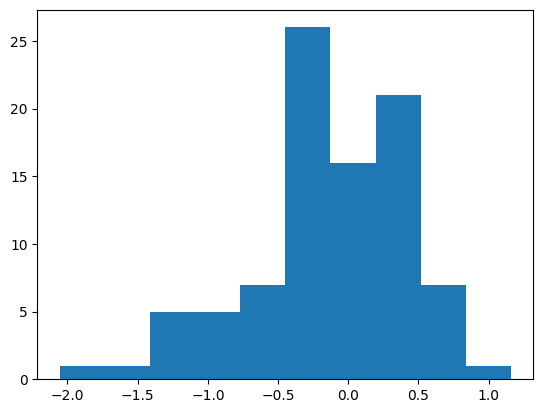

In [170]:
import matplotlib.pyplot as plt

plt.hist(model_2.state_dict()["block_1.0.weight"].cpu().reshape(-1))

(array([   3.,   14.,   70.,  413., 1588., 1869.,  713.,  179.,   43.,
           8.]),
 array([-0.91367221, -0.73809838, -0.56252456, -0.3869507 , -0.21137686,
        -0.03580302,  0.13977082,  0.31534466,  0.49091849,  0.66649234,
         0.84206617]),
 <BarContainer object of 10 artists>)

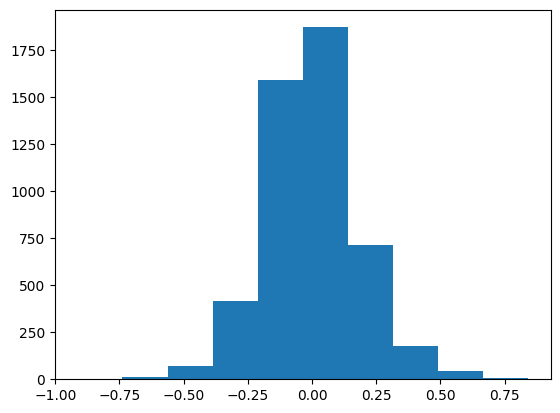

In [171]:
plt.hist(model_2.state_dict()["classifier.1.weight"].cpu().reshape(-1))